# Income Dataset - Analysis

We load the preprocessed dataset and we analyse the data.

## Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
sns.set()

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

## Load the Preprocessed dataset

In [3]:
os.getcwd()

'/content'

In [4]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Income Dataset/Income_preprocessed.csv')
data.head()

,Age,WorkClass,Weight,Education,EducationNumber,Occupation,Relationship,MarriageStatus,PartnerStatus,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Native Country,Salary
0,50,Self Employed,83311,Undergraduate,13,Exec-managerial,Husband,Married,Civil,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,High School,9,Handlers-cleaners,Not-in-family,Divorced,No Information,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,School,7,Handlers-cleaners,Husband,Married,Civil,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Undergraduate,13,Prof-specialty,Wife,Married,Civil,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Graduate,14,Exec-managerial,Wife,Married,Civil,White,Female,0,0,40,United-States,<=50K


## Analysis
We analyse the continuous variables and discrete variables.

### Continuous Variables

#### Age

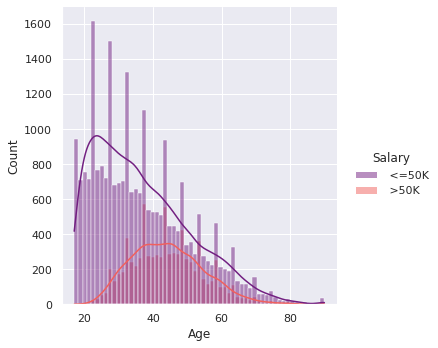

In [5]:
sns.displot(x='Age', data=data, hue='Salary', palette='magma', kde=True)

We note that the distribution of Age is right-skewed, evident especially in the class where salary is <=50K. 

In case of the salary >50K group, it can be seen that the median age is higher as opposed to the lower income group, indicating that the older people are richer compared to the young people.

#### Education

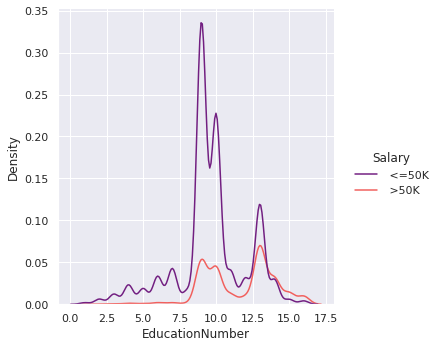

In [6]:
sns.displot(x='EducationNumber', data=data, hue='Salary', 
            palette='magma', kind='kde')

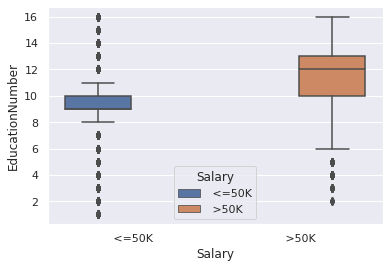

In [7]:
sns.boxplot(data=data, x='Salary', y='EducationNumber', hue='Salary')

We note that people who receive higher salary has a minimum of 9 years of education. It can also be noted that there are people who have studied for 15+ years and still earn a low salary!

A final takeaway is that most people who earn less than 50k annually have around 9-10 yeas of education, whereas the higher income group have more years of education.

#### Capital Gain

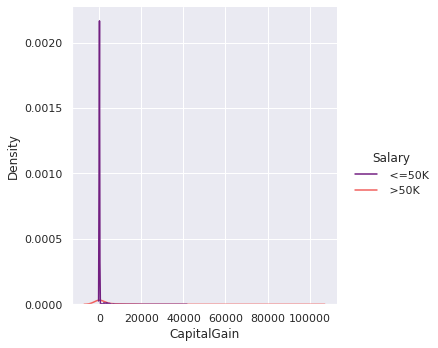

In [8]:
sns.displot(x='CapitalGain', data=data, hue='Salary', 
            palette='magma', kind='kde')

The Capital Gain between the two salary classes is HUGE.

### Discrete Variables

#### WorkClass

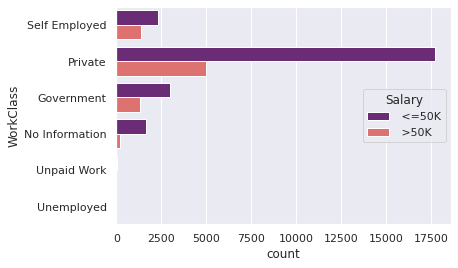

In [17]:
sns.countplot(y='WorkClass', data=data, hue='Salary', 
            palette='magma')

We note that majority of the employees are working in the Private Sector and that they earn a salary less than 50k annually. Due to the nature of the preprocessing and the scale of the count, the final two categories are negligibly small. The categories are not zero, as can be seen below:

In [18]:
data['WorkClass'].value_counts()

Private           22696
Government         4350
Self Employed      3657
No Information     1836
Unpaid Work          14
Unemployed            7
Name: WorkClass, dtype: int64

#### Marital Status and Partner Relationships

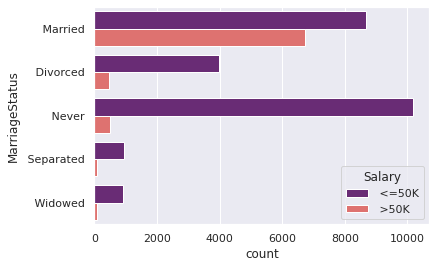

In [19]:
sns.countplot(y='MarriageStatus', data=data, hue='Salary', 
            palette='magma')

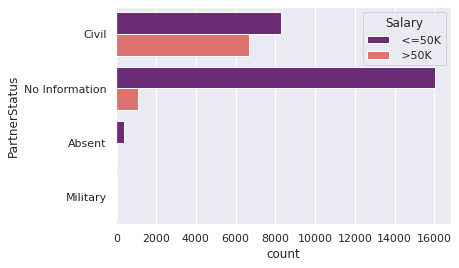

In [20]:
sns.countplot(y='PartnerStatus', data=data, hue='Salary', 
            palette='magma')

In [22]:
data['PartnerStatus'].value_counts()

No Information    17143
Civil             14976
Absent              418
Military             23
Name: PartnerStatus, dtype: int64

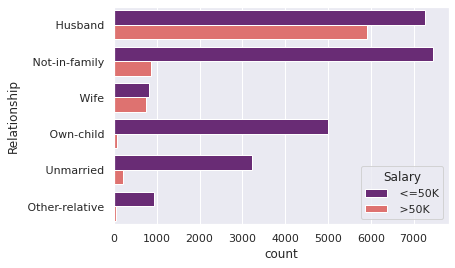

In [21]:
sns.countplot(y='Relationship', data=data, hue='Salary', 
            palette='magma')

We have three distinct notes:

1. A large number of employees that have low annual income have never married. Conversely, a large number of people who enjoy high annual income are married.
2. There is no information about the partners of the employees in this dataset. This non-information could be a based on a variety of factors ranging from personal behavior to cultural influences.
3. Families that have children belong mostly to the low income category.

#### Race and Native Country

In [24]:
data['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

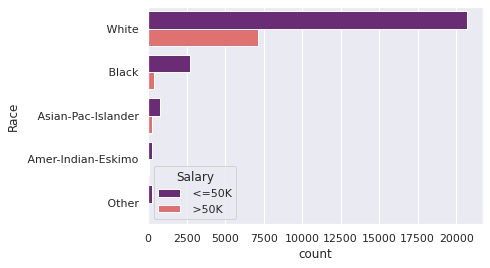

In [23]:
sns.countplot(y='Race', data=data, hue='Salary', 
            palette='magma')

It can be seen that there is a racial imbalance, since most of the employees are Whites.

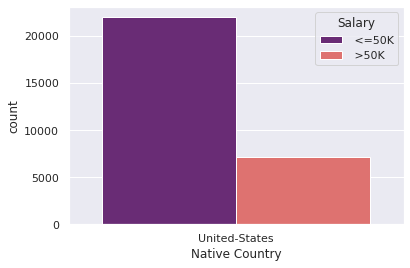

In [35]:
US_Salary = data.loc[data['Native Country']=='United-States'][['Native Country', 'Salary']]
sns.countplot(x='Native Country', data=US_Salary, hue='Salary', 
            palette='magma')

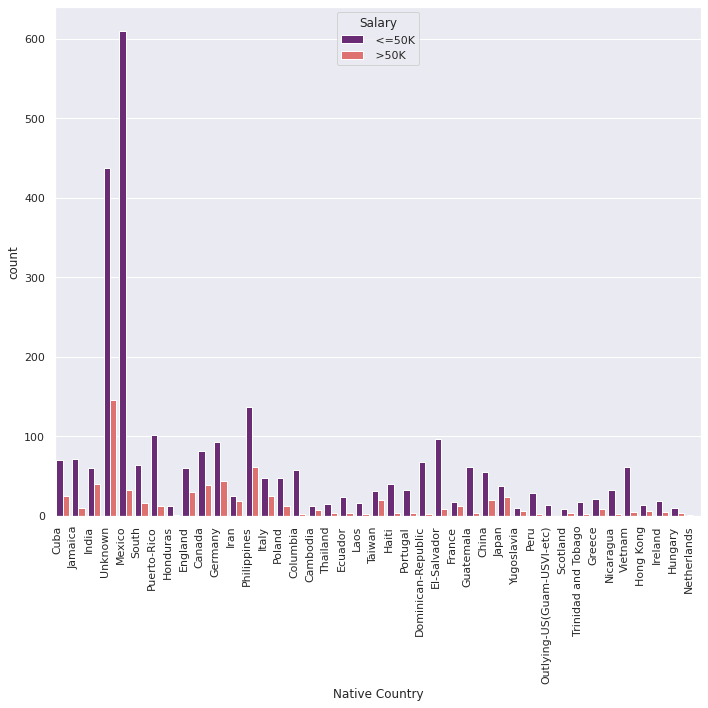

In [57]:
Non_US_Salary = data.loc[data['Native Country']!='United-States'][['Native Country', 'Salary']]
plt.figure(figsize=(10, 10))
ax = sns.countplot(x='Native Country', data=Non_US_Salary, hue='Salary', 
            palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

It can be seen that the employees belonging to the following countries generally have low annual income:

- Mexico
- Philippines
- Puerto - Rico
- El - Salvador

The employees of the following countries enjoy high annual income:

- United-States
- Germany
- Canada
- India
- England
- Japan

#### Sex

In [62]:
data['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

Thre is already a gender imbalance in this dataset.

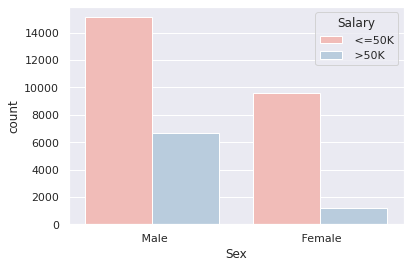

In [61]:
sns.countplot(x='Sex', data=data, hue='Salary', 
            palette='Pastel1')

Within the Male group, about 30% of the employees earn more than 50k annually. Within the female group, only about 10% of the employees earn the high income. Thus, there exists an income gap between the male and female employees.

#### Hours Per Week

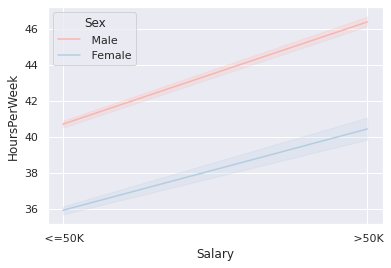

In [72]:
sns.lineplot(y='HoursPerWeek', x='Salary', data=data, hue='Sex', 
            palette='Pastel1')

It can be seen that females tend to work lesser hours per week compared to men, and their salaries are not as high as men either. There exists some relation between the variables HoursPerWeek and Salary with respect to Sex. 